#### 범주형 범주의 분류
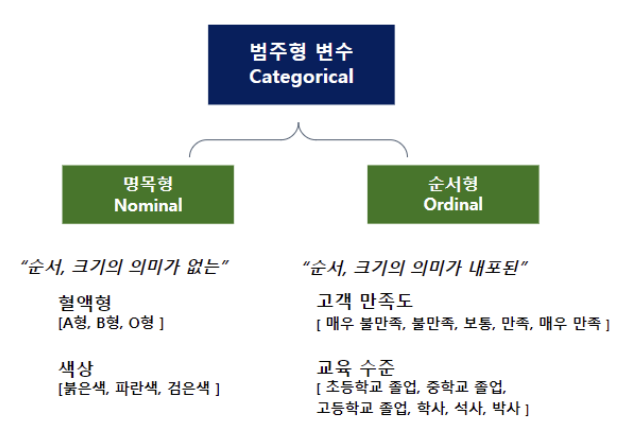
###### 순서가 있으면 순서형 / 순서가 없으면 명목형



#### 1. 데이터 불러오기

In [7]:
import pandas as pd

# 소득예측 데이터
itrain = pd.read_csv('data/income_train.csv')
itest = pd.read_csv('data/income_test.csv')

# 중고차 데이터
ctrain = pd.read_csv('data/car_train.csv')

#### 2. 범주형 변수 인코딩

In [30]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

itrain_copy = itrain.copy()
itest_copy = itest.copy()

# 범주형 변수 설정
categorical_var = ['workclass','education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

# LabelEncoder
encoder = LabelEncoder()

# 범주형 변수 LabelEncoder에 적용
for var in categorical_var:

    # train 데이터 fit 후 transform적용
    itrain_copy[var] = encoder.fit_transform(itrain_copy[var])
    
    # test 데이터는 transform만 적용
    itest_copy[var] = encoder.transform(itest_copy[var])

#### 3. 범주형 변수의 값이 학습데이터에 없는 경우

In [8]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# 범주형 변수 설정
categorical_var = ['workclass','education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

# 각 범주형 변수에 대해 LabelEncoder 적용
for var in categorical_var:
    encoder = LabelEncoder()

    # 'other' 추가하여 전체 데이터에 적용할 Series 생성
    # 해당 var 값에 'other'이 추가된다
    extended_train = pd.concat([itrain[var], pd.Series(['other'])], ignore_index=True)
    
    # 'other' 포함하여 fit
    # 'other'에 대한 Label을 부여하고 미리 학습함
    encoder.fit(extended_train)

    # 훈련 데이터와 테스트 데이터 변환
    itrain[var] = encoder.transform(itrain[var])  
    itest[var] = itest[var].apply(lambda x: encoder.transform([x])[0] if x in encoder.classes_ else encoder.transform(['other'])[0])

#### 4. Label Encoding을 명목형 변수에 적용시 문제점
###### (1) 직업과 같은 명목형 변수는 순서나 등급이 없다. 
###### (2) 따라서 이들에게 임의의 숫자를 부여하면 숫자 간의 순서나 중요도를 부여하는 문제를 일으킬 수 있다.

-----------------

#### 5. Label Encoding을 순서형 변수에 적용할 때의 문제점
###### (1) 일반적으로는 나쁨:0, 보통:1, 좋음:2 이런식으로 되는게 맞다.
###### (2) 하지만 LabelEncoder의 메카니즘상 나쁨:1, 보통:0, 좋음:2 이런식으로 될 수 있다.
###### (3) 즉 LabelEncoder는 순서를 알지 못한다.
###### (4) 순서형 변수에는 LabelEncoder가 적절하지 않다.

------------------------

#### 6. 범주형 변수 'education' 인코딩하기 - Label Encoding

In [54]:
# 데이터 불러오기
import pandas as pd

# 소득예측 데이터
train = pd.read_csv('data/income_train.csv')
test = pd.read_csv('data/income_test.csv')

In [63]:
from sklearn.preprocessing import LabelEncoder

# train 데이터 복사
train_ex1 = train.copy()

# LabelEncoder 호출
encoder = LabelEncoder()

# 'education' 인코딩하기
train_ex1['education'] = encoder.fit_transform(train_ex1['education'])

# 'education' 값 변화 확인
display(train.head(1))
display(train_ex1.head(1))

# 'education' 데이터 타입 변화 확인
display(train['education'].dtypes)
display(train_ex1['education'].dtypes)

# 'education' 고유값 변화 확인
display(train['education'].unique())
display(train_ex1['education'].unique())

,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
0,0,32,Private,309513,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0


,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
0,0,32,Private,309513,7,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0


dtype('O')

dtype('int32')

array(['Assoc-acdm', 'Some-college', 'Bachelors', 'HS-grad',
       'Prof-school', '10th', '11th', 'Masters', '7th-8th', '1st-4th',
       'Assoc-voc', '5th-6th', 'Doctorate', '9th', '12th', 'Preschool'],
      dtype=object)

array([ 7, 15,  9, 11, 14,  0,  1, 12,  5,  3,  8,  4, 10,  6,  2, 13])

-----------------

#### 7. 순서형 변수 인코딩하기 - Direct Mapping

In [66]:
# train 데이터 복제
train_ex2 = train.copy()

# 'education' 값 확인
train['education'].unique()

# 'education'을 Direct Mapping하기
# 해당 순서가 교육정도의 수준이다.
education_map = {'Preschool' : 0, 
                 '1st-4th' : 1, 
                 '5th-6th' : 2, 
                 '7th-8th' : 3,
                 '9th' : 4,
                 '10th' : 5,
                 '11th' : 6, 
                 '12th': 7, 
                 'HS-grad' : 8,
                 'Some-college' : 9,
                 'Assoc-voc' : 10,
                 'Assoc-acdm' : 11,
                 'Bachelors' : 12,
                 'Masters' : 13,
                 'Prof-school' : 14,
                 'Doctorate': 15 } 

# 'education' 컬럼값을 Mapping한 숫자로 바꾸기
train_ex2['education'] = train_ex2['education'].replace(education_map)

display(train_ex2.head())
display(train_ex2['education'].dtypes)
display(train_ex2['education'].unique())

C:\Users\NT930QCG\AppData\Local\Temp\ipykernel_25108\4136307726.py:27: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_ex2['education'] = train_ex2['education'].replace(education_map)


,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
0,0,32,Private,309513,11,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
1,1,33,Private,205469,9,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
2,2,46,Private,149949,9,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
3,3,23,Private,193090,12,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,0
4,4,55,Private,60193,8,9,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,0


dtype('int64')

array([11,  9, 12,  8, 14,  5,  6, 13,  3,  1, 10,  2, 15,  4,  7,  0],
      dtype=int64)

---------------------

#### 8. 순서형 변수 인코딩하기 - Ordinary Encoder

In [70]:
from sklearn.preprocessing import OrdinalEncoder

# 데이터 복제하기
train_ex3 = train.copy()

# OrdinalEncoder 초기화 및 범주 순서 지정
encoder_train = OrdinalEncoder(categories=[['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 
     'HS-grad', 'Some-college', 'Assoc-voc', 'Assoc-acdm', 'Bachelors', 'Masters', 
     'Prof-school', 'Doctorate']])

# 'education' 컬럼에 OrdinalEncoder 적용
train_ex3['education'] = encoder_train.fit_transform(train_ex3[['education']]).astype(int)

# 인코딩 순서 확인하기
display(encoder_train.categories_)

# 인코딩된 결과 확인
display(train_ex3.head())
display(train_ex3['education'].dtypes)
display(train_ex3['education'].unique())

[array(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th',
        '11th', '12th', 'HS-grad', 'Some-college', 'Assoc-voc',
        'Assoc-acdm', 'Bachelors', 'Masters', 'Prof-school', 'Doctorate'],
       dtype=object)]

,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
0,0,32,Private,309513,11,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
1,1,33,Private,205469,9,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
2,2,46,Private,149949,9,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
3,3,23,Private,193090,12,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,0
4,4,55,Private,60193,8,9,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,0


dtype('int32')

array([11,  9, 12,  8, 14,  5,  6, 13,  3,  1, 10,  2, 15,  4,  7,  0])

----------------

#### 9. 순서형 범주 인코딩시 주의할 점
###### [1] 고유 범주 수 축소: 도메인을 활용하여 유사한 범주 통합하기
###### [2] 의미 있는 수동 인코딩: 변수의 순서나 등급을 반영할 수 있는 Direct Mapping이나 Ordinary Encoder를 사용